In [1]:
%load_ext autoreload
%autoreload 2

In [102]:
from brute_stratum import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from decimal import Decimal
import pickle

In [47]:
# increase dpi of figures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
def get_label(s_tuple):
    stratum = ''
    for c in s_tuple:
        stratum += f'{c[0]}'
        if c[1] != 1:
            stratum += f'^{c[1]} '
        else:
            stratum += ' '

    return f'({stratum[:-1]})'

In [94]:
num_samps = 5000
n = 99
unfixed, fixed, results = compare_fixed_unfixed(99, genus=False, num_samples=num_samps)

In [101]:
num_samps = 100000
# n = 100

e_vals = []
t_vals = []

for n in range(1,501):
    fixed = get_stratums_sample(n, fixed=True, 
                                genus=False, num_samples=num_samps) 

    f = list(fixed.items())
    # u = list(fixed.items())

    f.sort(key = lambda x:x[1],reverse=True)

    # for s,c in u[:1]:
    s,c = f[0]

    e = c/num_samps
    t = 2/(n-1) if n %2==0 else 2/n
    print(f'Strate: {n}, Empirical: {Decimal(float(e)):.2E}, Theoretical: {Decimal(float(t)):.2E}')

    e_vals.append(e)
    t_vals.append(t)


Strate: 1, Empirical: 1.00E+0, Theoretical: 2.00E+0
Strate: 2, Empirical: 1.00E+0, Theoretical: 2.00E+0
Strate: 3, Empirical: 5.01E-1, Theoretical: 6.67E-1
Strate: 4, Empirical: 6.65E-1, Theoretical: 6.67E-1
Strate: 5, Empirical: 4.17E-1, Theoretical: 4.00E-1
Strate: 6, Empirical: 4.01E-1, Theoretical: 4.00E-1
Strate: 7, Empirical: 2.49E-1, Theoretical: 2.86E-1
Strate: 8, Empirical: 2.81E-1, Theoretical: 2.86E-1
Strate: 9, Empirical: 2.02E-1, Theoretical: 2.22E-1
Strate: 10, Empirical: 2.23E-1, Theoretical: 2.22E-1
Strate: 11, Empirical: 1.68E-1, Theoretical: 1.82E-1
Strate: 12, Empirical: 1.83E-1, Theoretical: 1.82E-1
Strate: 13, Empirical: 1.43E-1, Theoretical: 1.54E-1
Strate: 14, Empirical: 1.53E-1, Theoretical: 1.54E-1
Strate: 15, Empirical: 1.25E-1, Theoretical: 1.33E-1
Strate: 16, Empirical: 1.34E-1, Theoretical: 1.33E-1
Strate: 17, Empirical: 1.11E-1, Theoretical: 1.18E-1
Strate: 18, Empirical: 1.18E-1, Theoretical: 1.18E-1
Strate: 19, Empirical: 9.99E-2, Theoretical: 1.05E-1
St

In [103]:
pickle.dump((e_vals, t_vals), open('./strat_prob.sav', 'wb'))

In [105]:
len(e_vals)

500

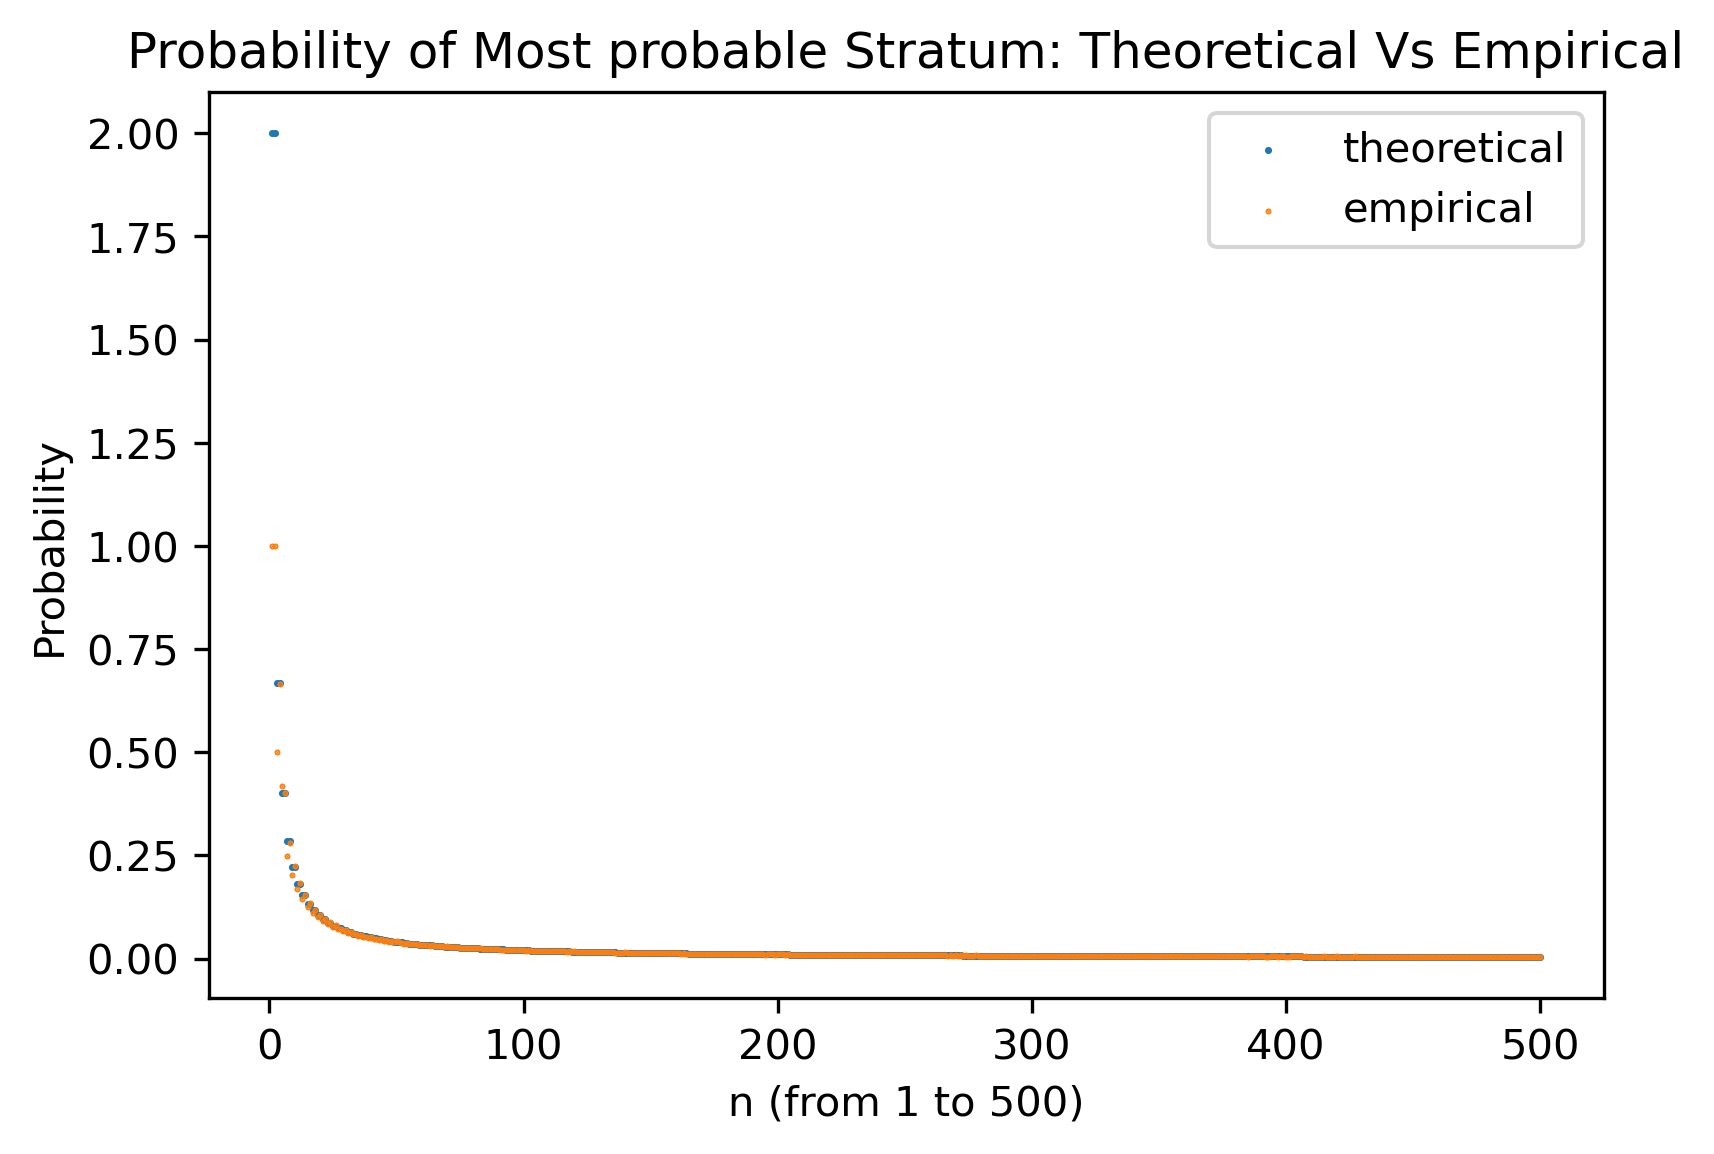

In [116]:
# plt.scatter(n, g_unfixed, label = "unfixed")
x = [i for i in range(1,501)]

plt.scatter(x, t_vals, label = "theoretical", s=0.5)
plt.scatter(x, e_vals, label = "empirical", s= 0.2)
plt.legend()
plt.title('Probability of Most probable Stratum: Theoretical Vs Empirical')
plt.xlabel('n (from 1 to 500)')
plt.ylabel('Probability')
plt.show()

In [95]:
f = list(fixed.items())
f.sort(key = lambda x:x[1], reverse=True)
f[:3]

[(((98, 1),), 95), (((0, 2), (96, 1)), 55), (((0, 1), (1, 1), (95, 1)), 54)]

In [11]:
def expected_val(vals, num_samples):
    expected = 0
    for val, sample in vals:
        expected += val*sample/num_samples
    
    return round(expected, 2)



In [42]:
num_samples= 50000
results = {}
props = []
for i in tqdm(range(1,251)):
    unfixed, fixed, _ = compare_fixed_unfixed(i, genus=True, num_samples=num_samples)
    values_unfixed = sorted(list(unfixed.items()), key = lambda x:x[1], reverse=True)
    values_fixed = sorted(list(fixed.items()), key = lambda x:x[1], reverse=True)

    props.append((values_unfixed[0][1], values_fixed[0][1]))

    results[i] = (expected_val(values_unfixed, num_samples),expected_val(values_fixed, num_samples))


100%|██████████| 250/250 [32:01<00:00,  7.69s/it]


In [43]:
r = list(results.items()) # col 1: genus, col 2: unfixed, col 3: fixed

In [44]:
n, g = zip(*r)
g_unfixed, g_fixed = zip(*g)

In [45]:
x = [i for i in range(1,251)]
y = [i/2 for i in range(1, 251)]

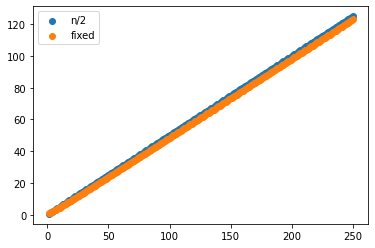

In [46]:
# plt.scatter(n, g_unfixed, label = "unfixed")
plt.scatter(x, y, label = "n/2")
plt.scatter(n, g_fixed, label = "fixed")
plt.legend()
plt.show()

In [53]:
fixed = [a / 50000  for a in fixed_prop]

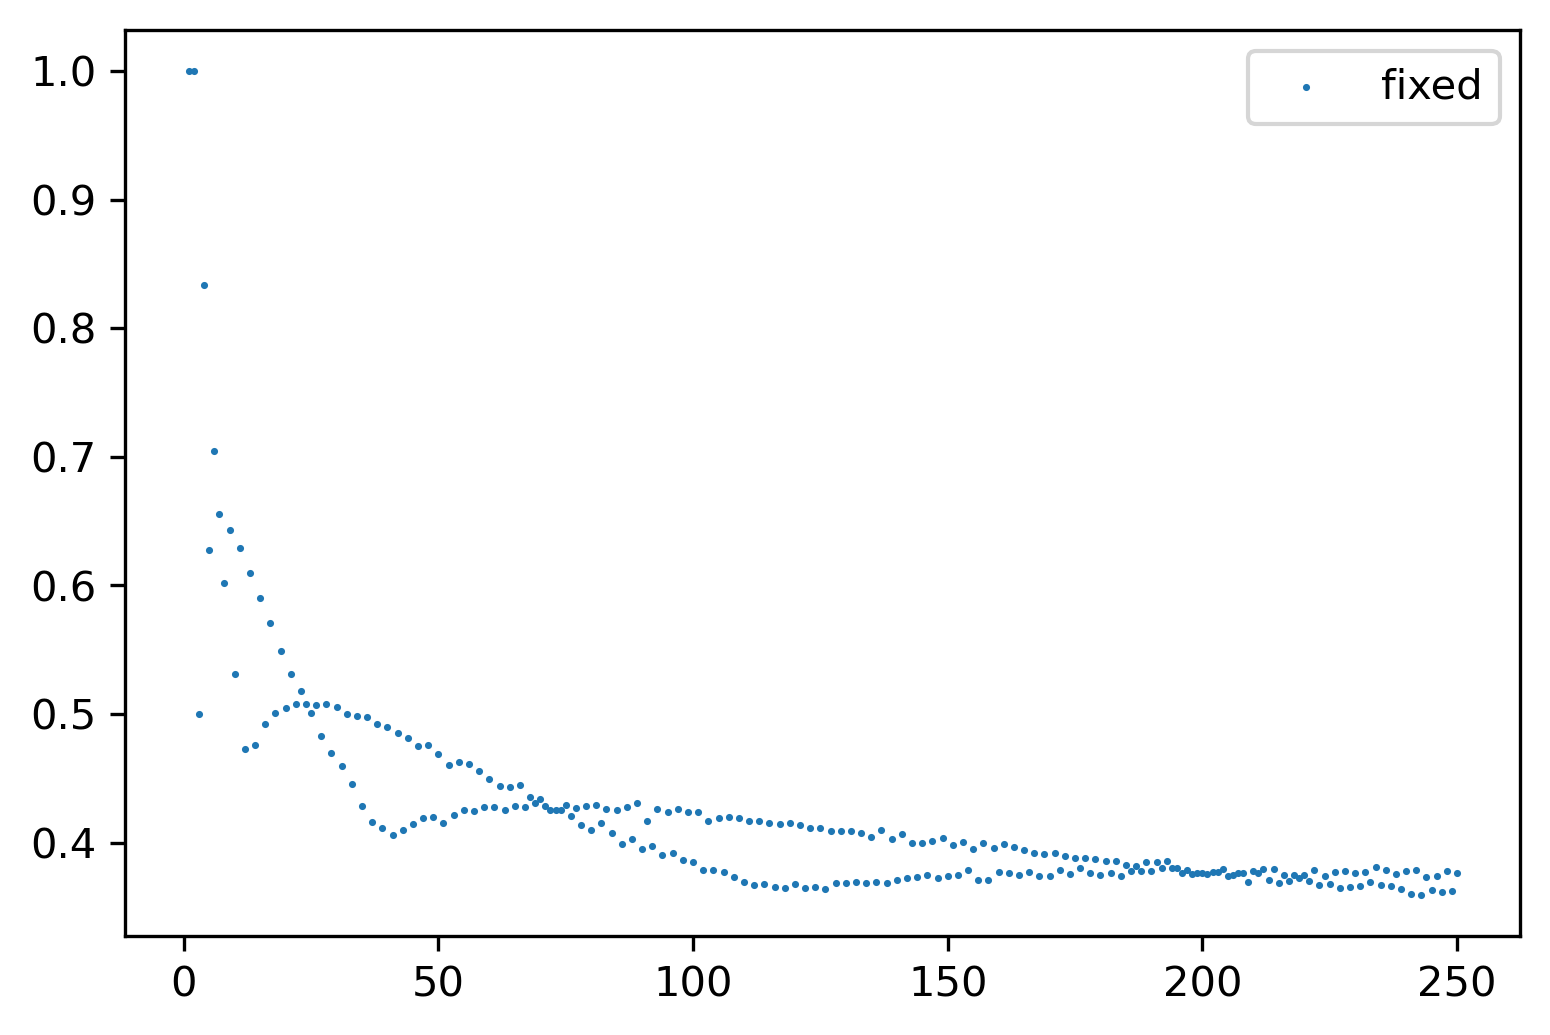

In [54]:
unfixed_prop, fixed_prop = zip(*props)

# plt.scatter(x, unfixed_prop, label = "unfixed", s=2)
plt.scatter(n, fixed, label = "fixed", s=0.5)
plt.legend()
plt.show()